In [60]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import add_funcs as af
import pandas as pd

from astropy.io import ascii

In [28]:
#Constants

M_sun = 1.989*10**33 #g
pc = 3.086*10**18 #cm
Mpc = 10**6 * pc
c = 299792.458 #kms

In [27]:
print(float('1.06E-002'))

0.0106


In [87]:
project_name = "NII_he4p00_AJ_10_90" #Write as e.g. "NII_he3p30_AJ_10_90"
epochs = ['200d', '250d', '300d', '350d', '400d'] #Write as e.g. '200d'
oxygen_zones = ['001', '002', '003', '004', '005',
               '006', '007', '008', '009', '010',
               '011', '012', '013'] #Starting at '001'

OI_cooling = np.zeros((len(epochs), len(oxygen_zones)))
MgI_cooling = np.zeros((len(epochs), len(oxygen_zones)))
best_cooler = np.zeros((len(epochs), len(oxygen_zones)), dtype = object)
best_cooler_val = np.zeros((len(epochs), len(oxygen_zones)))

for j in range(len(epochs)):
    for i in range(len(oxygen_zones)):

        cooling_path = "/home/stba7609/Documents/Projects/" + epochs[j] +  "/" + project_name + "/out/netheating/cooling.dat" + oxygen_zones[i]
        data = open(cooling_path, 'r')
        
        
        cooling_data = pd.read_csv(cooling_path, 
                 sep="\s+", 
                 skiprows=1, 
                 usecols=[2,3,4,5,6,7,8,9,10,11,12],
                 names = ['El', 'abs_cool_tot', 'rel_cool_tot', 'wl_line1', 'wl_line2', 'wl_line3'
                          , 'rel_cool_line1', 'rel_cool_line2', 'rel_cool_line3', 'glevel_line1', 'ulevel_line1'])
        
        OI_index = np.where(cooling_data['El'] == 'OI')[0][0]
        MgI_index = np.where(cooling_data['El'] == 'MgI')[0][0]
        best_index = np.argmax(cooling_data['rel_cool_tot'])
        
        OI_cooling[j, i] = cooling_data['rel_cool_tot'][OI_index]
        MgI_cooling[j, i] = cooling_data['rel_cool_tot'][MgI_index]
        best_cooler[j, i] = cooling_data['El'][best_index]
        best_cooler_val[j, i] = cooling_data['rel_cool_tot'][best_index]
        
        
        if i == 3:
            print("Best cooler in zone: ", oxygen_zones[i], ' at epoch ', epochs[j], ' ', best_cooler[j, i], ' with ', best_cooler_val[j, i])
        

        
                

Best cooler in zone:  004  at epoch  200d   MgII  with  0.3615
Best cooler in zone:  004  at epoch  250d   MgI  with  0.4963
Best cooler in zone:  004  at epoch  300d   MgI  with  0.4728
Best cooler in zone:  004  at epoch  350d   NeII  with  0.5588
Best cooler in zone:  004  at epoch  400d   NeII  with  0.9252


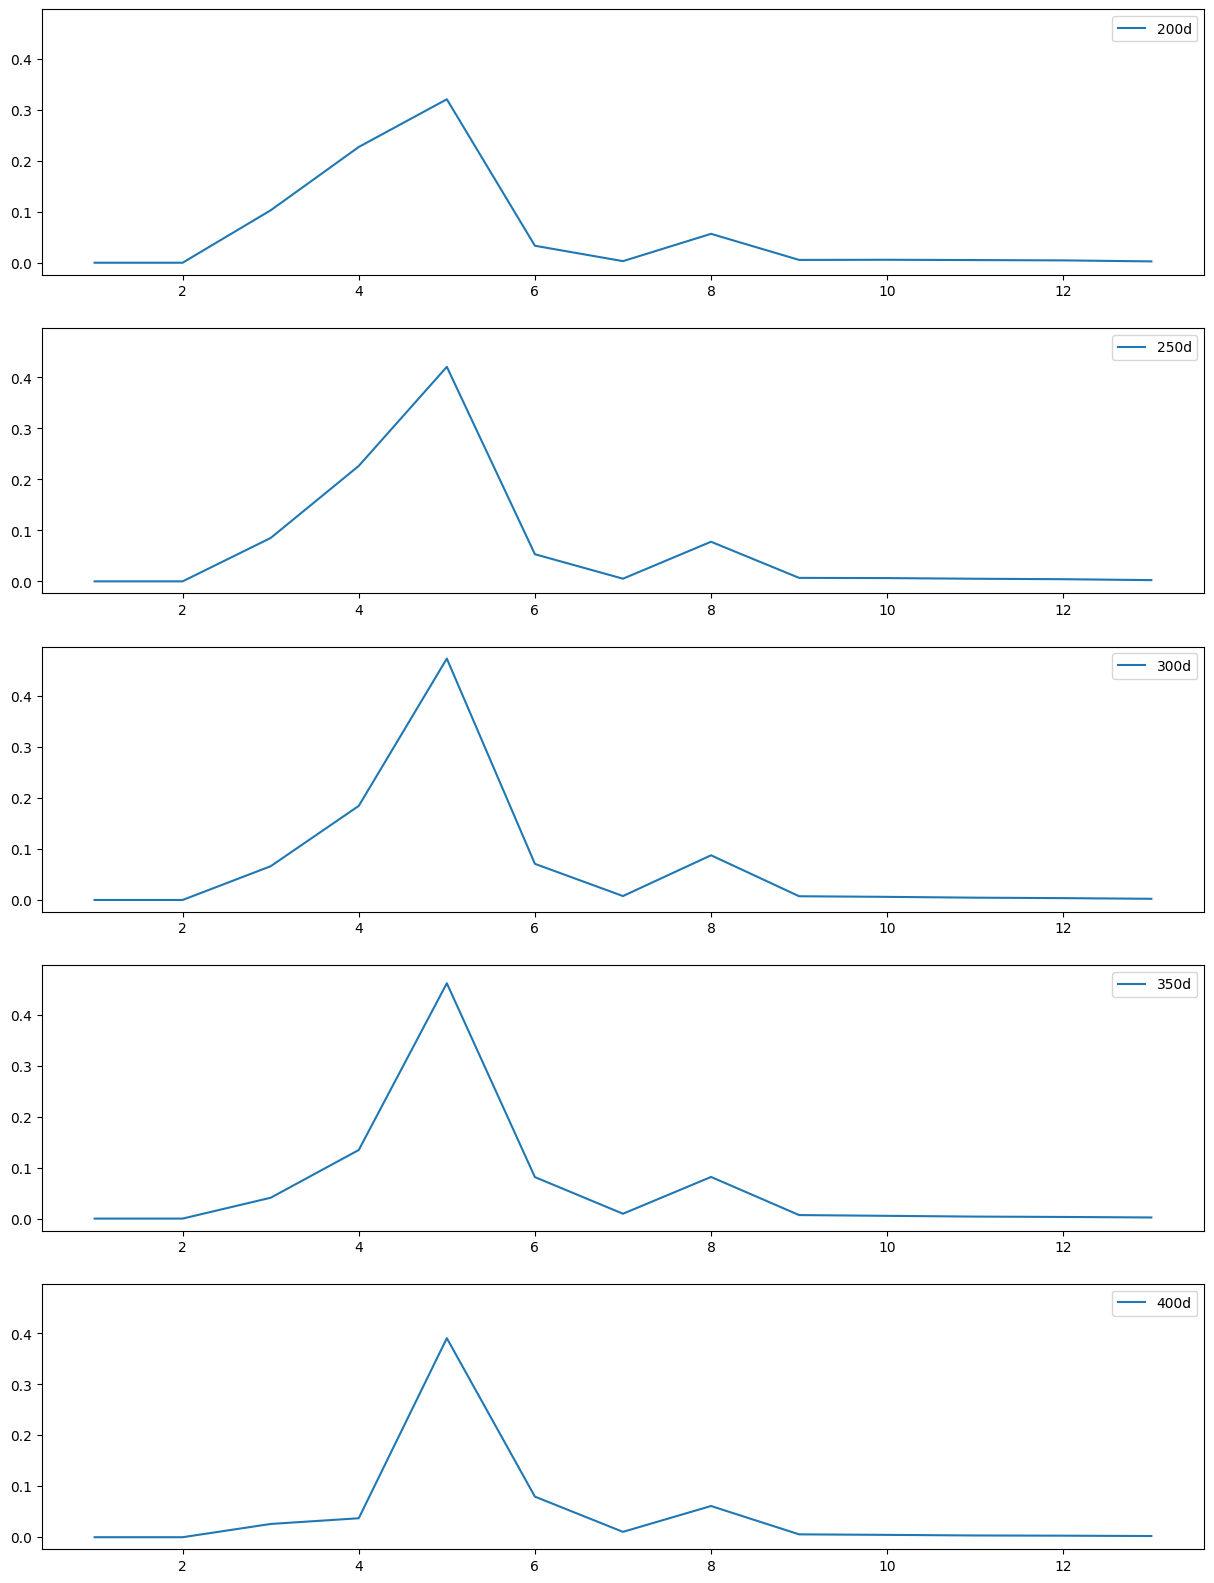

In [77]:
fig, ax = plt.subplots(len(epochs), 1, sharey = True)

for i in range(len(epochs)):
    
    ax[i].plot(np.arange(1, len(oxygen_zones)+1), OI_cooling[i, :], label = epochs[i])
    
    ax[i].legend()
    
fig.set_size_inches(15, 20)
plt.show()

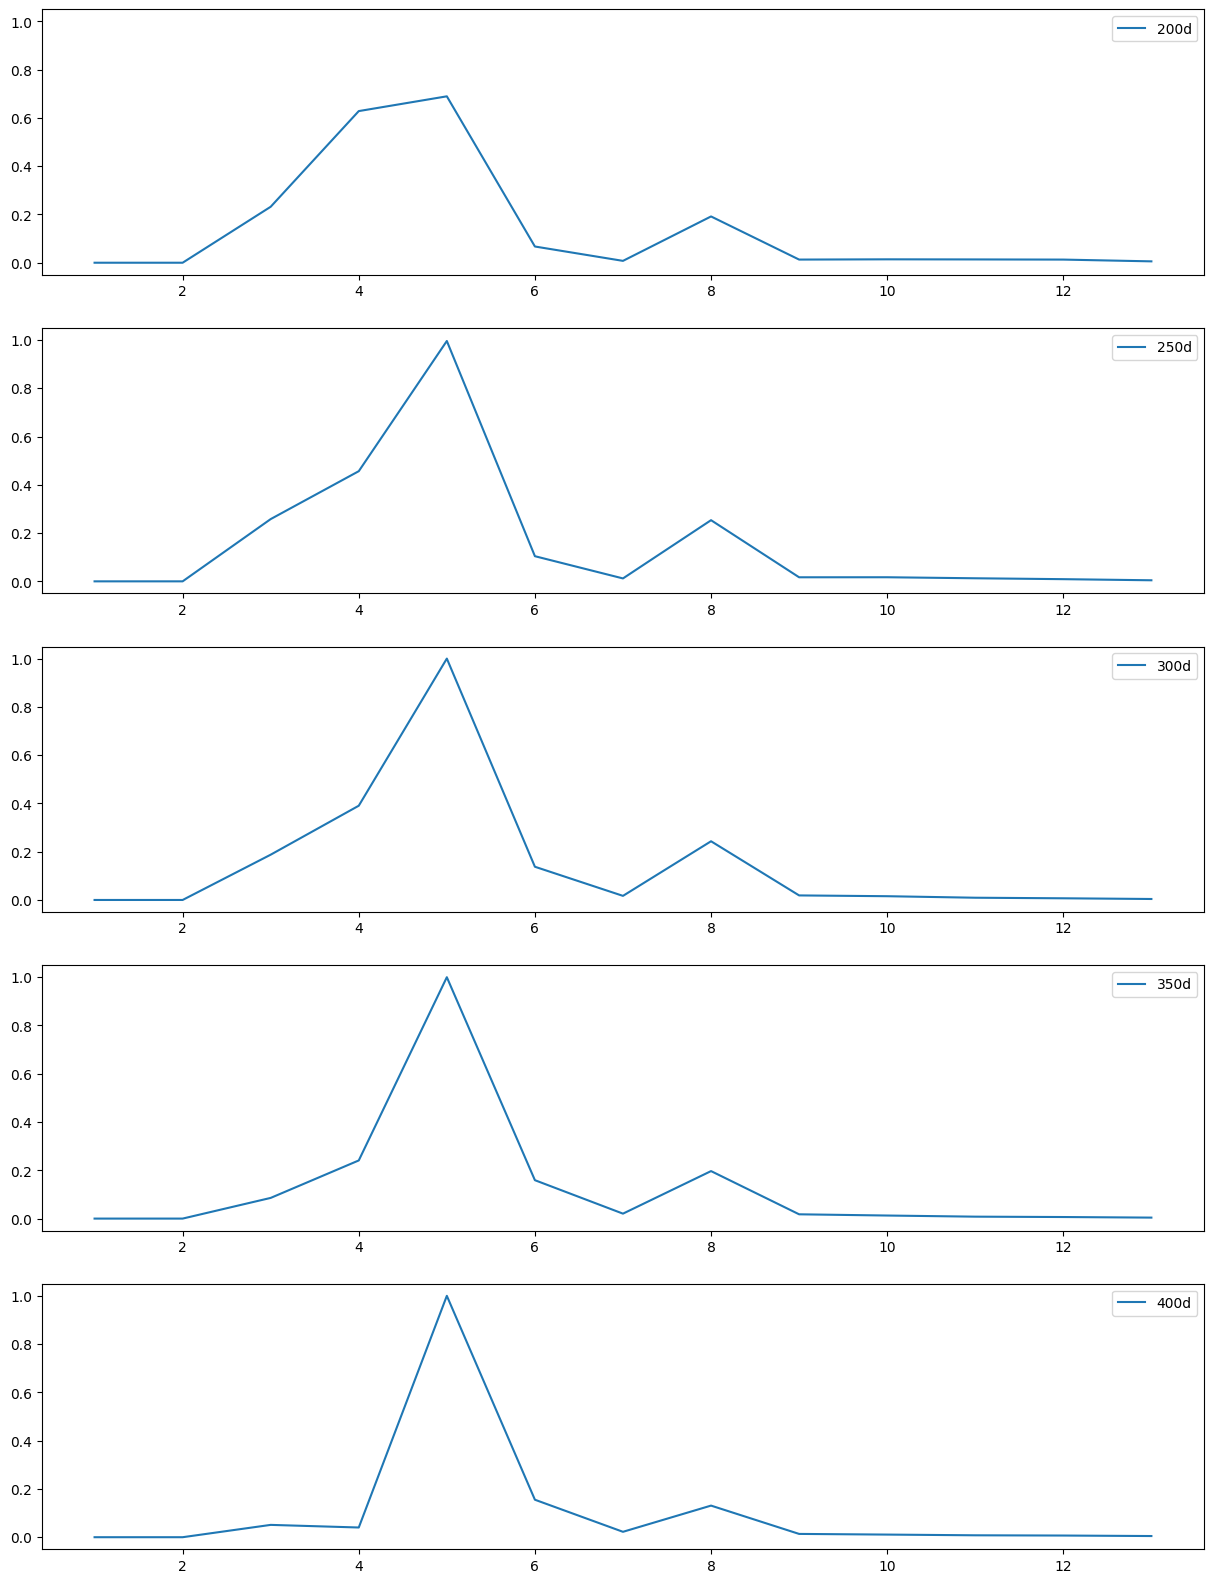

In [78]:
fig, ax = plt.subplots(len(epochs), 1, sharey = True)

for i in range(len(epochs)):
    
    ax[i].plot(np.arange(1, len(oxygen_zones)+1), OI_cooling[i, :]/best_cooler_val[i, :], label = epochs[i])
    
    ax[i].legend()
    
fig.set_size_inches(15, 20)
plt.show()

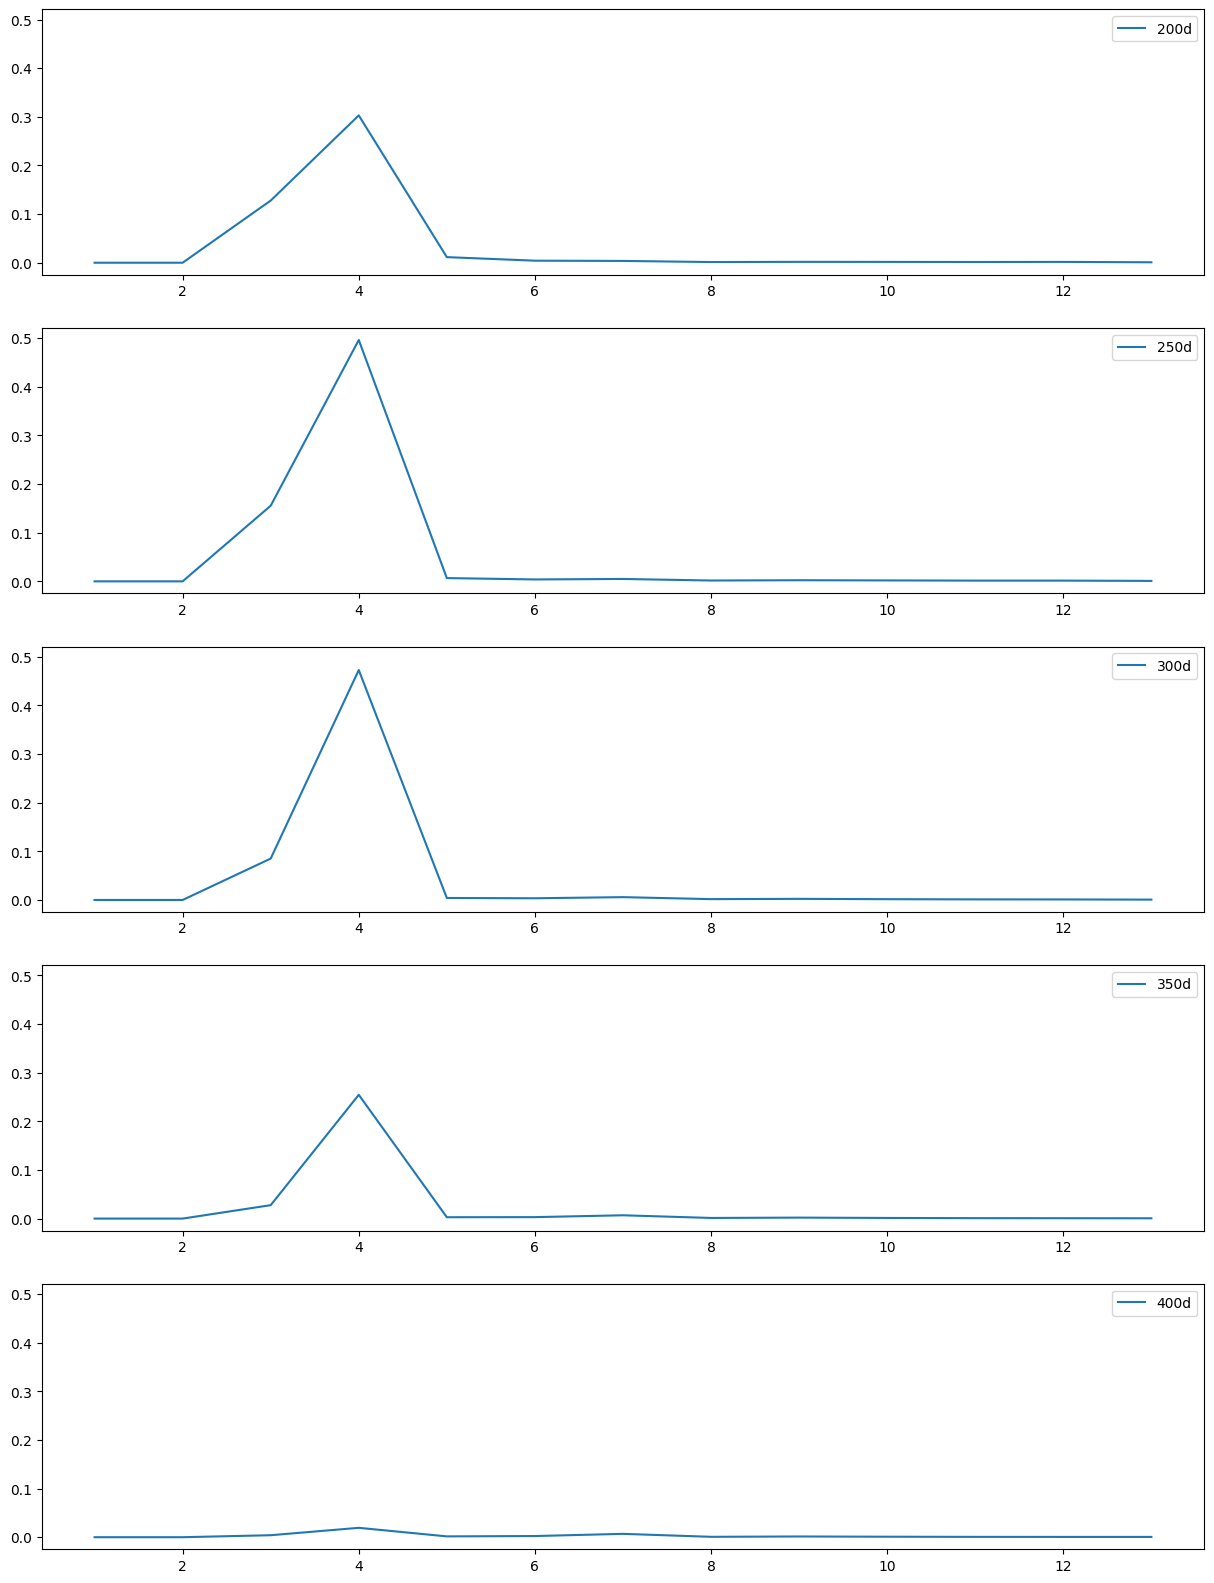

In [81]:
fig, ax = plt.subplots(len(epochs), 1, sharey = True)

for i in range(len(epochs)):
    
    ax[i].plot(np.arange(1, len(oxygen_zones)+1), MgI_cooling[i, :], label = epochs[i])
    
    ax[i].legend()
    
fig.set_size_inches(15, 20)
plt.show()

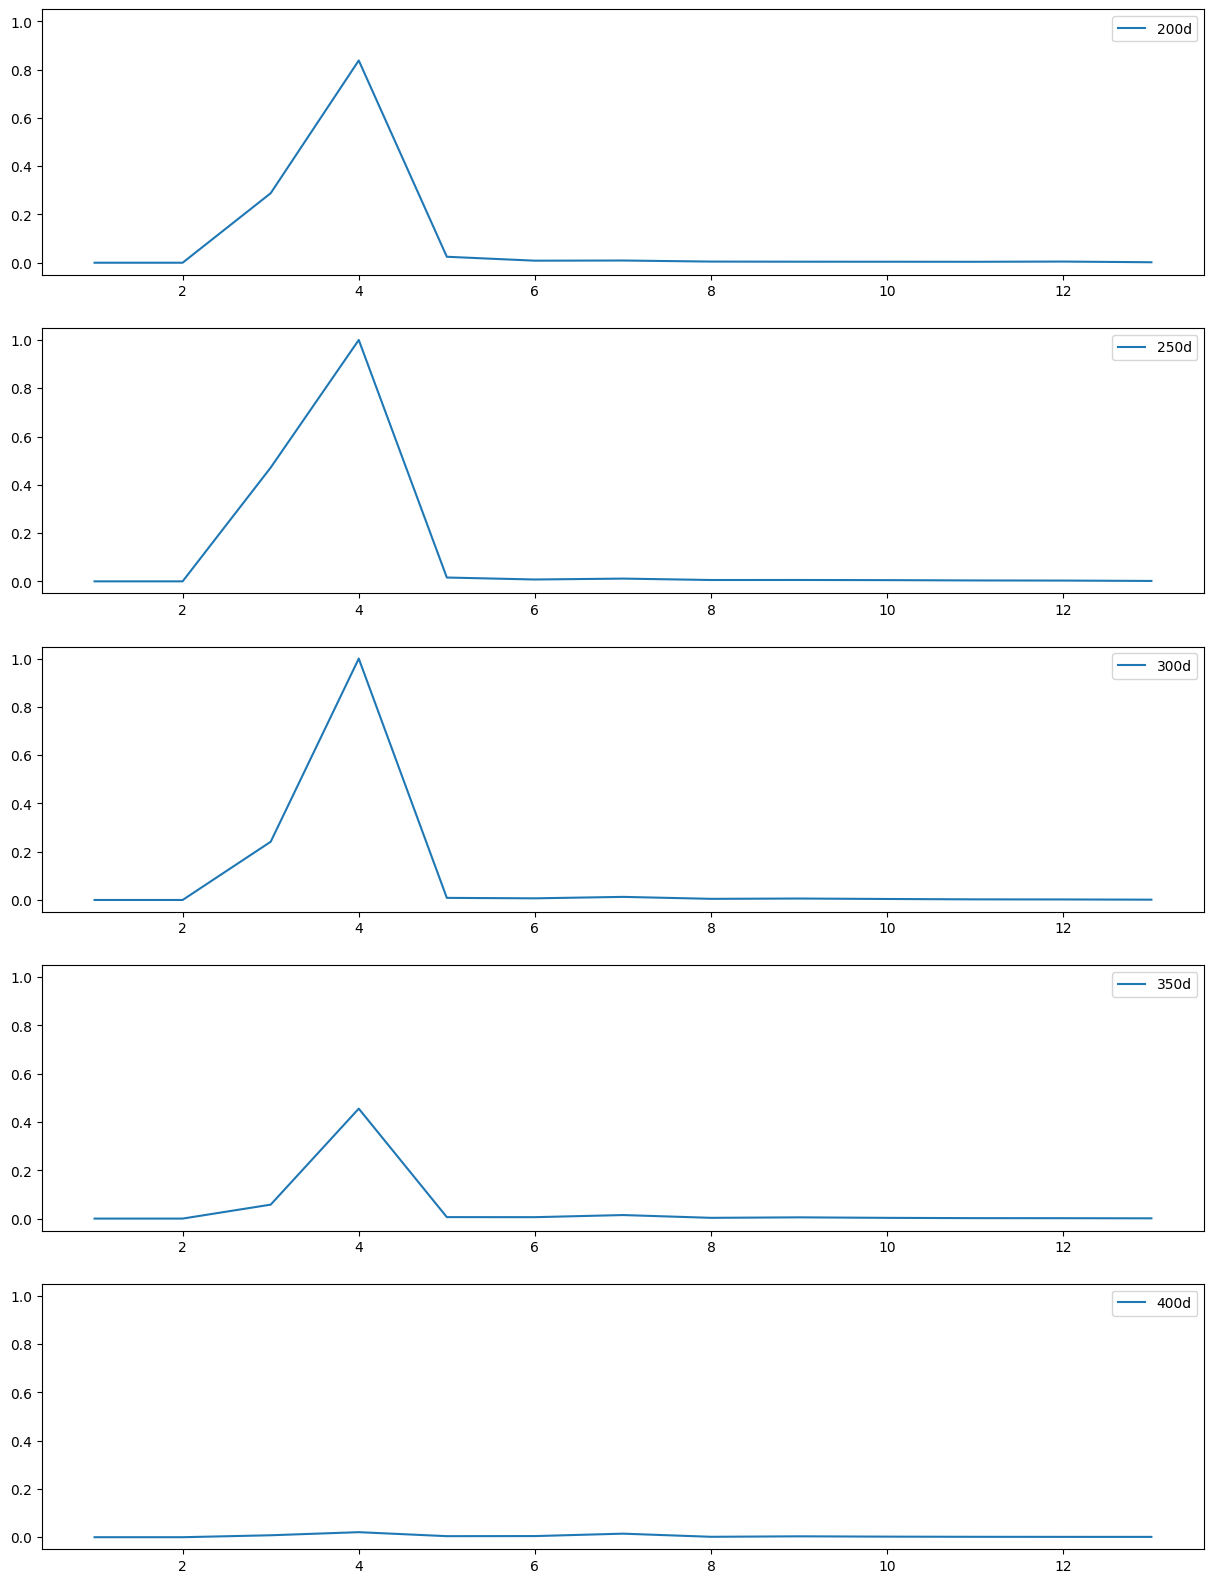

In [80]:
fig, ax = plt.subplots(len(epochs), 1, sharey = True)

for i in range(len(epochs)):
    
    ax[i].plot(np.arange(1, len(oxygen_zones)+1), MgI_cooling[i, :]/best_cooler_val[i, :], label = epochs[i])
    
    ax[i].legend()
    
fig.set_size_inches(15, 20)
plt.show()

In [48]:
for i in range(len(epochs)):
    print('Here are the most important lines for epoch: ', epochs[i])
    for j in range(len(oxygen_zones)):
        if j == 3:
            print('Zone ', oxygen_zones[j], ': ', best_cooler[i, j])

Here are the most important lines for epoch:  200d
Zone  004 :  2795.53
Here are the most important lines for epoch:  250d
Zone  004 :  4562.6
Here are the most important lines for epoch:  300d
Zone  004 :  128140.0
Here are the most important lines for epoch:  350d
Zone  004 :  128140.0
Here are the most important lines for epoch:  400d
Zone  004 :  128140.0


## Snippets

In [ ]:
print('The data for zone: ', i+1, ' and epoch ', epochs[j])
write = False

for line in data:
    if 'BEST' in line or write == True:
        write = True
        print(line)

    if 'BEST' in line:
        counter = 0
        for char in line:
            if char.isnumeric() and counter > 17:
                number_string = line[counter:]
                best_cooler[j, i] = float(number_string)
                break

            counter += 1


    if '6300 doublet' in line:
        counter = 0
        for char in line:
            if char.isnumeric() and counter > 17:
                number_string = line[counter:]
                print(number_string)
                OI_cooling[j, i] = float(number_string)
                break

            counter += 1